# Piechart

In [5]:
import sys
sys.path.append('../utils')

import utils

In [6]:
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import plot, iplot, init_notebook_mode

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

## Matplotlib

### A simple pie chart

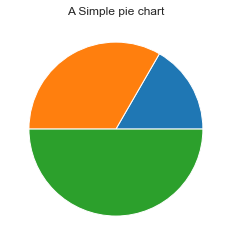

In [7]:
plt.pie([1,2,3])
plt.title('A Simple pie chart')

# Saving the image
utils.save_mpl(1)

plt.show()

### Piechart with labels & annotations

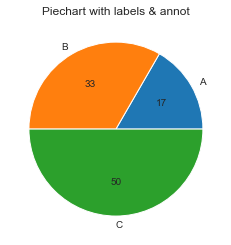

In [8]:
plt.pie(
    x=[1,2,3],
    labels=['A', 'B', 'C'],
    autopct='%1.0f'
)
plt.title('Piechart with labels & annot')

# Saving the image
utils.save_mpl(2)

plt.show()

### Piechart with `explode` and `shadow` & other customizations

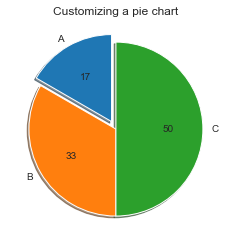

In [9]:
plt.pie(
    x=[1,2,3],
    labels=['A', 'B', 'C'],
    autopct='%1.0f',
    shadow=True,
    explode=[0.1, 0, 0],
    startangle=90
)
plt.title('Customizing a pie chart')

# Saving the image
utils.save_mpl(3)

plt.show()

### Some more customizations (text color, size etc)

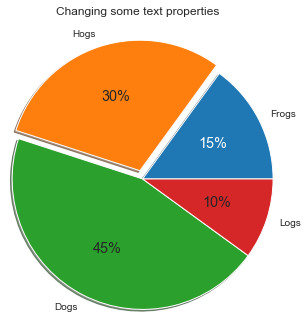

In [25]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

patches, texts, autotexts = plt.pie(
    fracs, labels=labels,
    autopct='%.0f%%',
    shadow=True, radius=1.5,
    explode=(0, 0.1, 0, 0)
)
# Setting annotation font size to large
plt.setp(autotexts, size='x-large')
# Changing color of one of the annotation texts
autotexts[0].set_color('white')

plt.suptitle('Changing some text properties', x=.5, y=1.1)

utils.save_mpl(4)
plt.show()

### Adding legend to the piechart

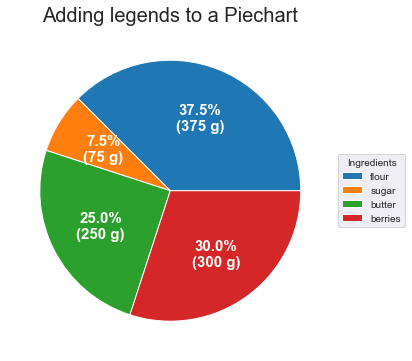

In [65]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Adding legends to a Piechart", fontsize=20)

# Saving the image
utils.save_mpl(5)
plt.show()

### Donut!!

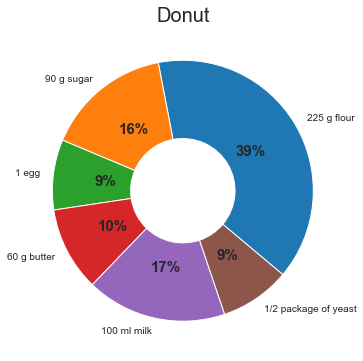

In [79]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 50]

wedges, texts, autotexts = plt.pie(
    data,
    labels=recipe,
    autopct='%.0f%%',
    wedgeprops=dict(width=0.6),
    startangle=-40,
)
plt.setp(autotexts, size=15, weight="bold")
plt.title('Donut', fontsize=20)

# Saving the image
utils.save_mpl(6)
plt.show()

### Piecharts in subplots

[Link](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_demo2.html#sphx-glr-gallery-pie-and-polar-charts-pie-demo2-py)

This example demonstrates some pie chart features like labels, varying size, autolabeling the percentage, offsetting a slice and adding a shadow.

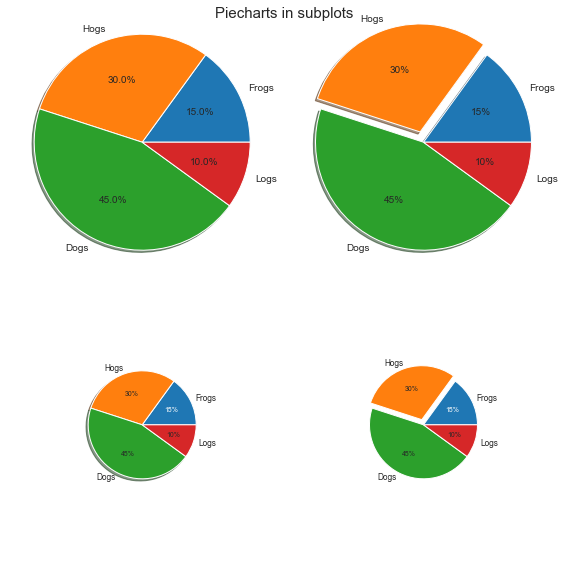

In [80]:

# Some data
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

# Make figure and axes
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# A standard pie plot
axs[0, 0].pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

# Shift the second slice using explode
axs[0, 1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.1, 0, 0))

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axs[1, 0].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=True, radius=0.5)
# Make percent texts even smaller
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

# Use a smaller explode and turn of the shadow for better visibility
patches, texts, autotexts = axs[1, 1].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
                                          explode=(0, 0.05, 0, 0))
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')
plt.suptitle('Piecharts in subplots', fontsize=15)
plt.tight_layout()


# Saving the image
utils.save_mpl(7)
plt.show()

### Nested pie charts

[Link](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py)

The following examples show two ways to build a nested pie chart in Matplotlib. Such charts are often referred to as donut charts.

Requires:
```python
import matplotlib.pyplot as plt
import numpy as np
```

The most straightforward way to build a pie chart is to use the pie method

In this case, pie takes values corresponding to counts in a group. We'll first generate some fake data, corresponding to three groups. In the inner circle, we'll treat each number as belonging to its own group. In the outer circle, we'll plot them as members of their original 3 groups.

The effect of the donut shape is achieved by setting a width to the pie's wedges through the wedgeprops argument.

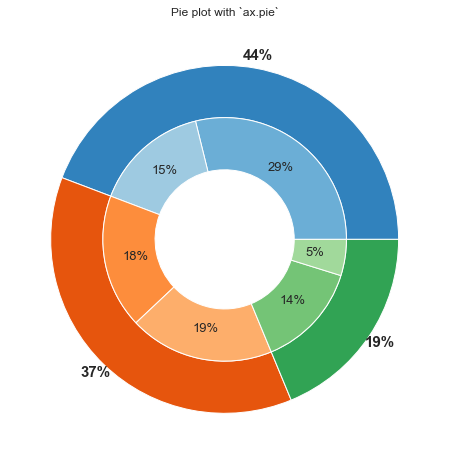

In [101]:
fig, ax = plt.subplots(figsize=(10, 8))

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

# Using pctdistance to alter the placements of the labels
patches, texts, autotexts1 = ax.pie(
    vals.sum(axis=1), radius=1, colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    autopct='%.0f%%', pctdistance=1.07
)

# Same here, using pctdistance to alter the text's placements
patches, texts, autotexts2 = ax.pie(
    vals.flatten(), radius=1-size, colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    autopct='%.0f%%', pctdistance=.75
)

plt.setp(autotexts1, size=15, weight="bold")
plt.setp(autotexts2, size=13)

ax.set(aspect="equal", title='Pie plot with `ax.pie`')

# Saving the image
utils.save_mpl(8)
plt.show()